<a href="https://colab.research.google.com/github/MohitGupta2021/ml/blob/main/decision_trees_for_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import numpy as np
 import pandas as pd
 import seaborn as sns
 import sklearn 
 import matplotlib.pyplot as plt
 %matplotlib inline

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
machine_cpu=fetch_openml(name='machine_cpu')

In [5]:
machine_cpu.data.shape

(209, 6)

In [6]:
machine_cpu.DESCR

'**Author**:   \n**Source**: Unknown -   \n**Please cite**:   \n\nThe problem concerns Relative CPU Performance Data. More information can be obtained in the UCI Machine\n Learning repository (http://www.ics.uci.edu/~mlearn/MLSummary.html).\n The used attributes are :\n MYCT: machine cycle time in nanoseconds (integer)\n MMIN: minimum main memory in kilobytes (integer)\n MMAX: maximum main memory in kilobytes (integer)\n CACH: cache memory in kilobytes (integer)\n CHMIN: minimum channels in units (integer)\n CHMAX: maximum channels in units (integer)\n PRP: published relative performance (integer) (target variable)\n \n Original source: UCI machine learning repository. \n Source: collection of regression datasets by Luis Torgo (ltorgo@ncc.up.pt) at\n http://www.ncc.up.pt/~ltorgo/Regression/DataSets.html\n Characteristics: 209 cases; 6 continuous variables\n\nDownloaded from openml.org.'

In [7]:
machine_cpu.frame

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,class
0,125.0,256.0,6000.0,256.0,16.0,128.0,198.0
1,29.0,8000.0,32000.0,32.0,8.0,32.0,269.0
2,29.0,8000.0,32000.0,32.0,8.0,32.0,220.0
3,29.0,8000.0,32000.0,32.0,8.0,32.0,172.0
4,29.0,8000.0,16000.0,32.0,8.0,16.0,132.0
...,...,...,...,...,...,...,...
204,124.0,1000.0,8000.0,0.0,1.0,8.0,42.0
205,98.0,1000.0,8000.0,32.0,2.0,8.0,46.0
206,125.0,2000.0,8000.0,0.0,2.0,14.0,52.0
207,480.0,512.0,8000.0,32.0,0.0,0.0,67.0


In [11]:
X_train=machine_cpu.data
Y_train=machine_cpu.target

In [12]:
type(machine_cpu)

sklearn.utils.Bunch

In [14]:
type(X_train)

pandas.core.frame.DataFrame

In [15]:
type(Y_train)

pandas.core.series.Series

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.2,random_state=20)

In [17]:
len(X_train)

167

In [18]:
len(X_test)

42

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0840978910>,
      dtype=object)

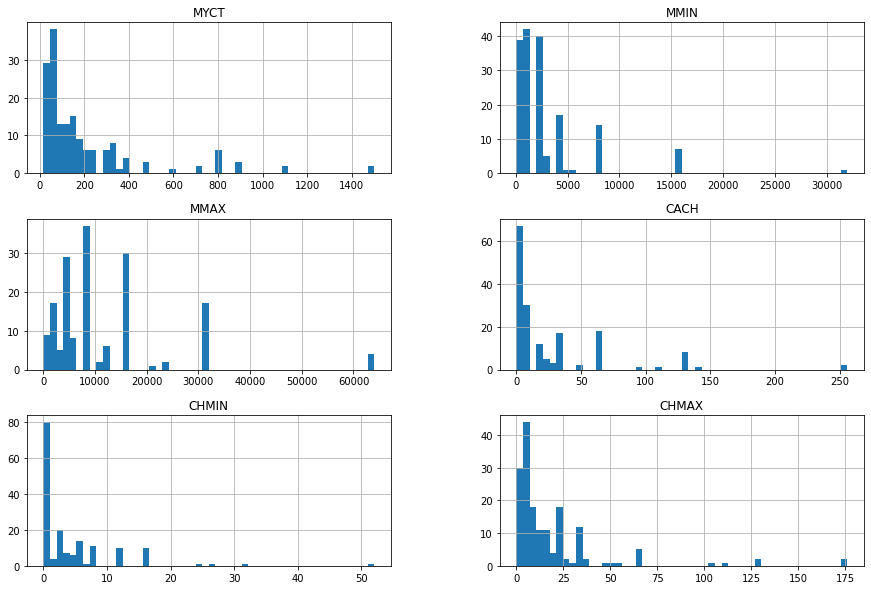

In [19]:
X_train.hist(bins=50,figsize=(15,10))

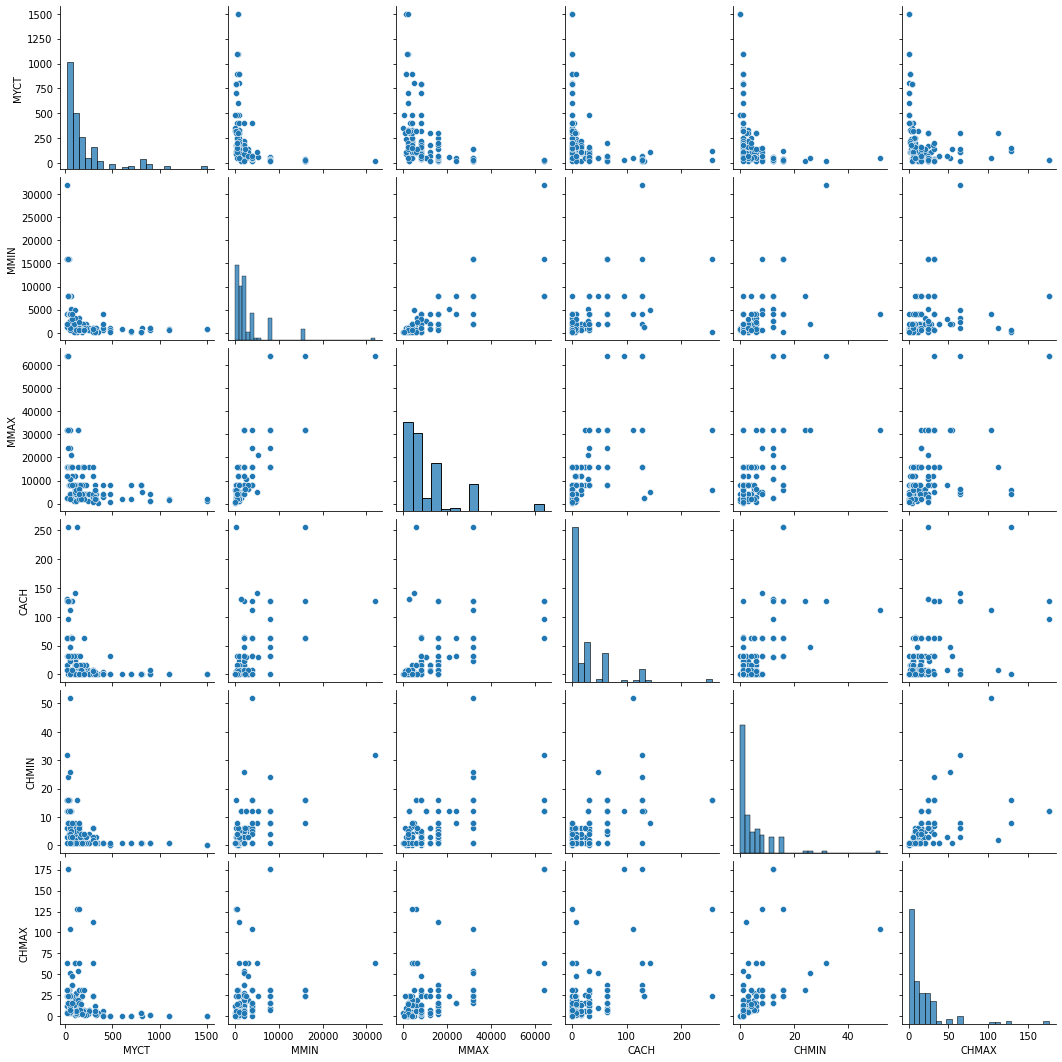

In [20]:
sns.pairplot(X_train)

In [21]:
X_train.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,207.958084,2900.826347,11761.161677,26.071856,4.760479,18.616766
std,266.772823,4165.950964,12108.332354,42.410014,6.487439,27.489919
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000
75%,232.500000,3100.000000,16000.000000,32.000000,6.000000,24.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000


In [22]:
X_train.isnull().sum()

MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import  Pipeline
scale_pipe=Pipeline([('scaler',StandardScaler())])


In [25]:
X_train_scaled=scale_pipe.fit_transform(X_train)

In [27]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [28]:
scaled_reg=DecisionTreeRegressor()
scaled_reg.fit(X_train_scaled,y_train)

DecisionTreeRegressor()

In [29]:
from sklearn.metrics import mean_squared_error

def predict(input_data,model,labels):
   
    
    preds = model.predict(input_data)
    mse = mean_squared_error(labels,preds)
    rmse = np.sqrt(mse)
    rmse
    
    return rmse

In [30]:
predict(X_train,tree_reg,y_train)

9.724590719956222

In [31]:
predict(X_train_scaled,scaled_reg,y_train)

9.724590719956222

In [35]:
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(0, 10)), 'min_samples_split': [0,1,2, 3, 4], 
              'max_depth':[None,0,1,2,3]}

#refit is true by default. The best estimator is trained on the whole dataset 

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), params_grid, verbose=1, cv=3, refit=True)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 250 candidates, totalling 750 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 0, 1, 2, 3],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=1)

In [36]:
grid_search.best_params_

{'max_depth': None, 'max_leaf_nodes': 9, 'min_samples_split': 4}

In [37]:
grid_search.best_estimator_

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=4, random_state=42)

In [38]:
tree_best=grid_search.best_estimator_

In [39]:
predict(X_train, tree_best, y_train)

34.999530266023044

In [40]:
predict(X_test, tree_reg, y_test)

43.135445594854666